In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28*28))/ 255.0
test_images = test_images.reshape((10000, 28*28))/255.0


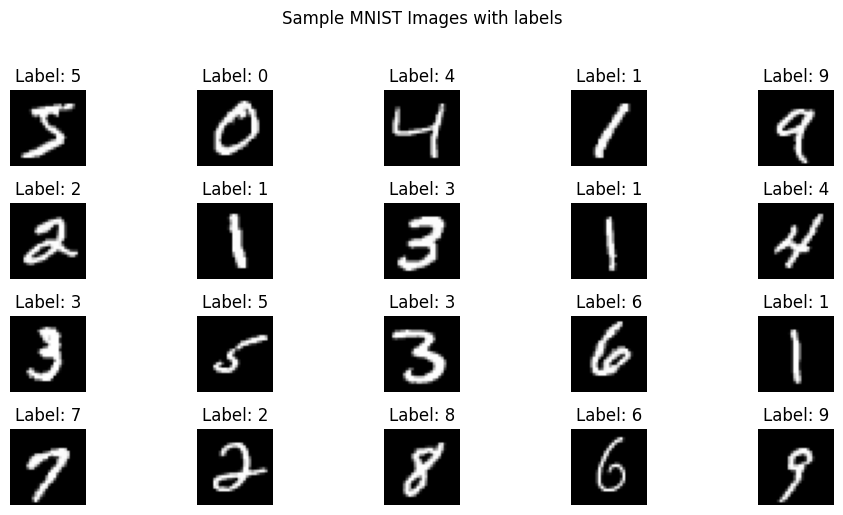

In [4]:
plt.figure(figsize = (10, 5))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap = 'gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.suptitle('Sample MNIST Images with labels', y = 1.02)
plt.tight_layout()
plt.show()


In [5]:
from tensorflow.keras import regularizers

model = models.Sequential([
    layers.Dense(1024, activation='swish', kernel_regularizer=regularizers.l2(1e-4), input_shape=(784,)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(512, activation='swish', kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256, activation='swish', kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Dense(10, activation='softmax')
])

In [6]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [7]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

lr_schedule = ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.5, patience=2, verbose=1
)

early_stop = EarlyStopping(
    monitor='val_accuracy', patience=5, restore_best_weights=True
)

history = model.fit(
    train_images, train_labels,
    epochs=75,
    batch_size=128,
    validation_data=(test_images, test_labels),
    callbacks=[lr_schedule, early_stop]
)

Epoch 1/75
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.8858 - loss: 0.5535 - val_accuracy: 0.9645 - val_loss: 0.2746 - learning_rate: 0.0010
Epoch 2/75
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - accuracy: 0.9601 - loss: 0.2871 - val_accuracy: 0.9737 - val_loss: 0.2384 - learning_rate: 0.0010
Epoch 3/75
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.9700 - loss: 0.2450 - val_accuracy: 0.9760 - val_loss: 0.2182 - learning_rate: 0.0010
Epoch 4/75
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.9731 - loss: 0.2277 - val_accuracy: 0.9766 - val_loss: 0.2099 - learning_rate: 0.0010
Epoch 5/75
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 48ms/step - accuracy: 0.9776 - loss: 0.2060 - val_accuracy: 0.9774 - val_loss: 0.2007 - learning_rate: 0.0010
Epoch 6/75
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.9782 - loss: 0.1984 - val_accuracy: 0.9795 - val_loss: 0.1919 - learning_rate: 0.0010
Epoch 7/75
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9788 - l

In [8]:

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9844 - loss: 0.1081

Test accuracy: 0.9878


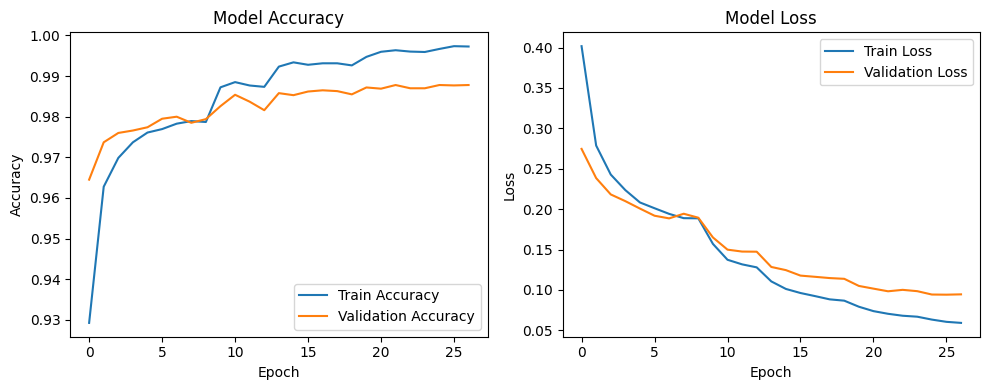

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


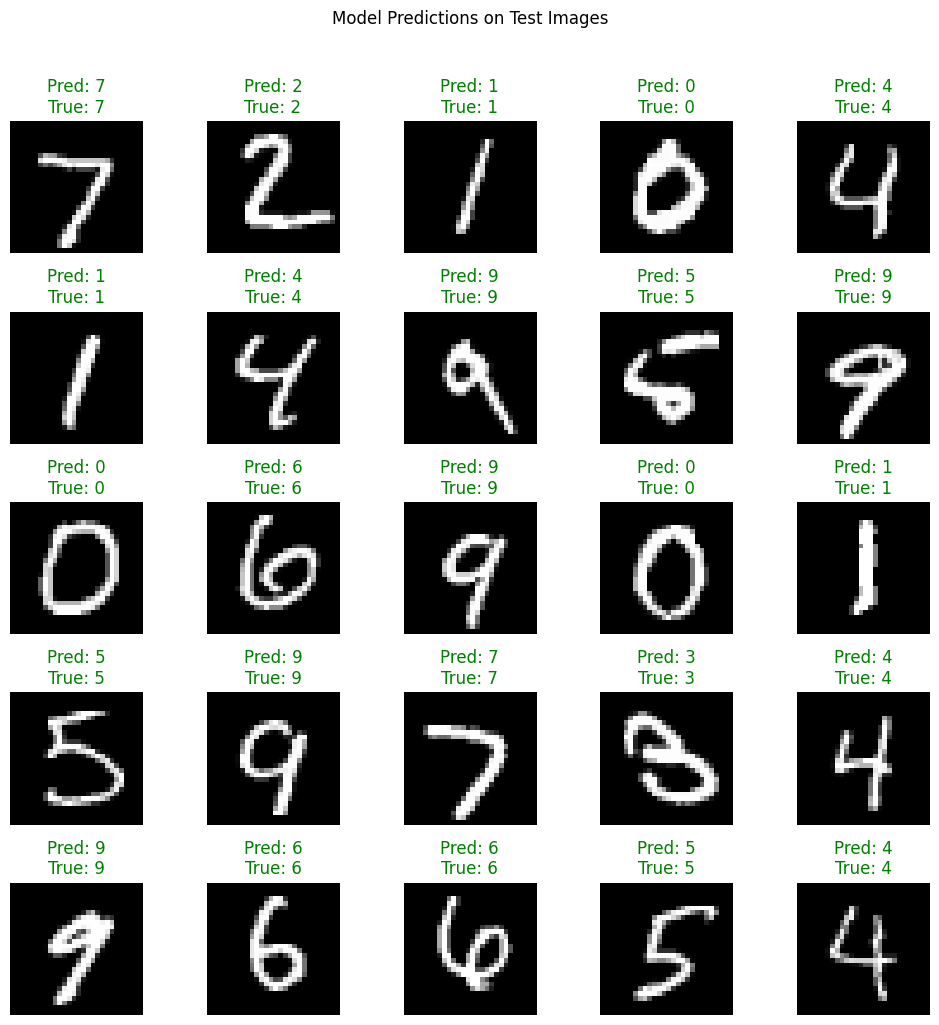

In [10]:
predictions = model.predict(test_images)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')
plt.suptitle('Model Predictions on Test Images', y=1.02)
plt.tight_layout()
plt.show()